In [1]:
# GWAS Dataset Cleaning for Asthma SNPs 
# Dataset: NHGRI-EBI GWAS Catalog

import pandas as pd
import os
import csv

In [2]:
# ---------- CONFIG ----------
P_THRESHOLD = 5e-8  # Genome-wide significance level
CHROMOSOMES_TO_KEEP = list(map(str, range(1, 23))) + ['X', 'Y']
# ----------------------------

# Load the raw dataset
df = pd.read_csv('Meta-analysis_results_UKBB_TAGC.txt', sep='\t', header=0)

# Converting the .txt file to .csv file
df.to_csv(r'Meta-analysis df.csv', index=False, header=True)
print(f"Loaded dataset with shape: {df.shape}")

# Inspect the dataset
df.head()
df.columns
df.info()

Loaded dataset with shape: (8365359, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8365359 entries, 0 to 8365358
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   SNP                  object 
 1   CHR                  int64  
 2   BP                   int64  
 3   EA                   object 
 4   NEA                  object 
 5   Z                    float64
 6   P                    float64
 7   Direction_UKBB_TAGC  object 
 8   P_het                float64
 9   N                    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 638.2+ MB


In [3]:
## Basic cleaning
# 1. Drop duplicates
# 2. Drop rows with missing essential values
# 3. Keep only valid chromosomes

df_clean = df.drop_duplicates()
df_clean = df_clean.dropna(subset=['SNP', 'CHR', 'BP', 'P'])

df_clean['CHR'] = df_clean['CHR'].astype(str)
df_clean = df_clean[df_clean['CHR'].isin(CHROMOSOMES_TO_KEEP)]

print(f"Cleaned dataset shape: {df_clean.shape}")
df_clean.head()

Cleaned dataset shape: (8365359, 10)


,SNP,CHR,BP,EA,NEA,Z,P,Direction_UKBB_TAGC,P_het,N
0,1:100004463_TA_T,1,100004463,T,TA,0.374,0.708100,-+,0.2873,536345
1,1:10001235_TTTCG_T,1,10001235,T,TTTCG,2.298,0.021590,++,0.3433,536345
2,1:100015192_CT_C,1,100015192,CT,C,-0.804,0.421200,-+,0.4221,536345
3,1:10005296_AC_A,1,10005296,A,AC,-2.698,0.006978,--,0.8032,536345
4,1:100068864_TC_T,1,100068864,T,TC,0.213,0.831500,-+,0.1159,536345


In [4]:
# Filter for genome-wide significant SNPs

df_sig = df_clean[df_clean['P'] < P_THRESHOLD].copy()
print(f" Number of genome-wide significant SNPs (P < {P_THRESHOLD}): {df_sig.shape[0]}")
df_sig.head()

 Number of genome-wide significant SNPs (P < 5e-08): 33017


,SNP,CHR,BP,EA,NEA,Z,P,Direction_UKBB_TAGC,P_het,N
304,1:10274560_CA_C,1,10274560,CA,C,-5.974,2.310000e-09,--,0.5014,536345
314,1:10284785_AT_A,1,10284785,A,AT,5.972,2.346000e-09,++,0.6187,536345
348,1:10310049_TG_T,1,10310049,T,TG,6.011,1.849000e-09,++,0.6443,536345
458,1:10370712_CTGTG_C,1,10370712,CTGTG,C,-6.022,1.719000e-09,--,0.5434,536345
489,1:10428980_TC_T,1,10428980,T,TC,5.997,2.011000e-09,++,0.6384,536345


In [5]:
# Save outputs

df_clean.to_csv("gwas_data.csv", index=False)
df_sig.to_csv("gwas_sign_snps.csv", index=False)

print("Cleaned datasets saved successfully!")
print("gwas_data.csv")
print("gwas_sign_snps.csv")

Cleaned datasets saved successfully!
gwas_data.csv
gwas_sign_snps.csv


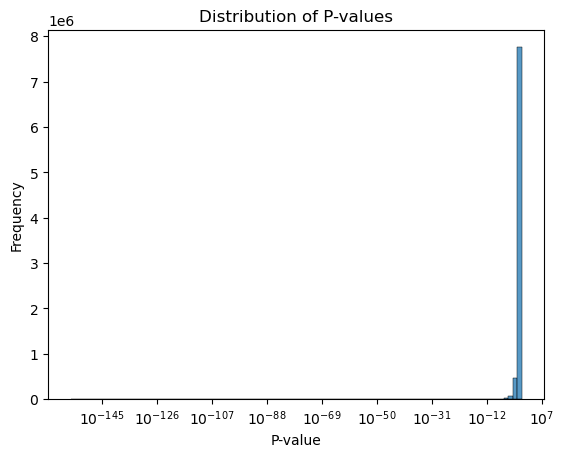

In [6]:
# Visualize P-value distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_clean['P'], bins=100, log_scale=True)
plt.title('Distribution of P-values')
plt.xlabel('P-value')
plt.ylabel('Frequency')

plt.savefig("Distribution of P-Values.png")
plt.show()